In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('Datasets/movie_profit.csv')

In [3]:
data.head()

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,1,6/22/2007,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy
1,2,7/28/1995,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action
2,3,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure
3,4,12/25/2013,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action
4,5,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action


In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
data.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,6/22/2007,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy
1,7/28/1995,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action
2,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure
3,12/25/2013,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action
4,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action


In [6]:
data.isnull().sum()

release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
distributor           48
mpaa_rating          137
genre                  0
dtype: int64

In [8]:
# Show the rows where distributor has missing values
missing_distributor = data[data['distributor'].isnull()]
# print(missing_distributor)

In [9]:
data.dropna(inplace=True)
data.isnull().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
distributor          0
mpaa_rating          0
genre                0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.describe()

,production_budget,domestic_gross,worldwide_gross
count,3.230000e+03,3.230000e+03,3.230000e+03
mean,3.459218e+07,4.726805e+07,9.841706e+07
std,3.526337e+07,5.973707e+07,1.432841e+08
min,2.500000e+05,0.000000e+00,0.000000e+00
25%,1.000000e+07,6.867944e+06,1.177994e+07
50%,2.200000e+07,2.733297e+07,4.404424e+07
75%,4.900000e+07,6.341329e+07,1.252019e+08
max,1.750000e+08,4.745447e+08,1.304866e+09


In [12]:
data.sort_values(by='production_budget', ascending=False, inplace=True)
data

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,6/22/2007,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy
1,7/28/1995,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action
2,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure
3,12/25/2013,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action
4,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action
...,...,...,...,...,...,...,...,...
3395,4/11/2003,Better Luck Tomorrow,250000.0,3802390.0,3.809226e+06,Paramount Pictures,R,Drama
3396,10/28/2011,Like Crazy,250000.0,3395391.0,3.728400e+06,Paramount Pictures,PG-13,Drama
3397,7/14/2000,Chuck&Buck,250000.0,1055671.0,1.157672e+06,Artisan,R,Drama
3398,3/28/1997,Love and Other Catastrophes,250000.0,212285.0,7.432160e+05,Fox Searchlight,R,Comedy


In [13]:
data.value_counts('genre')

genre
Drama        1180
Comedy        775
Action        540
Adventure     469
Horror        266
Name: count, dtype: int64

In [14]:
# Show average domestic gross by mpaa_rating
data.groupby('mpaa_rating')['domestic_gross'].mean()

mpaa_rating
G        8.253156e+07
PG       6.742011e+07
PG-13    5.487091e+07
R        3.208529e+07
Name: domestic_gross, dtype: float64

In [18]:
# show average domestic gross by genre
data.groupby('genre')['domestic_gross'].mean()

genre
Action       6.474280e+07
Adventure    8.714000e+07
Comedy       4.167048e+07
Drama        2.917919e+07
Horror       3.804494e+07
Name: domestic_gross, dtype: float64

In [19]:
data.groupby('genre')['production_budget'].mean()

genre
Action       5.850313e+07
Adventure    6.230153e+07
Comedy       2.517041e+07
Drama        2.238141e+07
Horror       1.881391e+07
Name: production_budget, dtype: float64

In [20]:
# Show correlation for domestic_gross and production_budget for each genre
data.groupby('genre')[['domestic_gross', 'production_budget']].corr()

domestic_gross  production_budget
genre                                                         
Action    domestic_gross           1.000000           0.618289
          production_budget        0.618289           1.000000
Adventure domestic_gross           1.000000           0.471146
          production_budget        0.471146           1.000000
Comedy    domestic_gross           1.000000           0.465426
          production_budget        0.465426           1.000000
Drama     domestic_gross           1.000000           0.440451
          production_budget        0.440451           1.000000
Horror    domestic_gross           1.000000           0.331295
          production_budget        0.331295           1.000000

<Axes: xlabel='genre'>

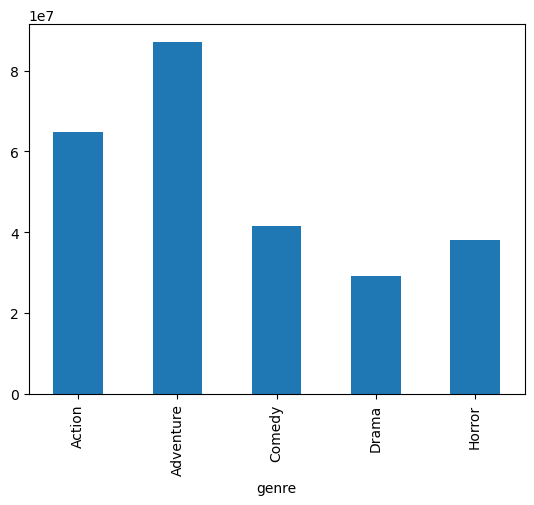

In [21]:
# Show a bar plot of log average domestic gross by genre
data.groupby('genre')['domestic_gross'].mean().plot(kind='bar')

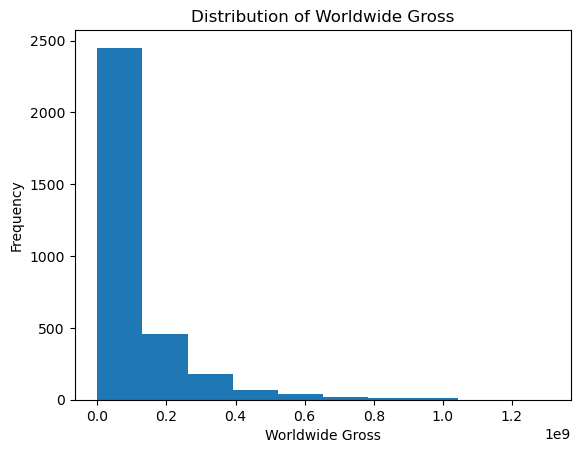

In [22]:
# Distribution of worldwide gross
plt.hist(data['worldwide_gross'])
plt.title('Distribution of Worldwide Gross')
plt.xlabel('Worldwide Gross')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Show movie count year wise with string slices
data.groupby(data['release_date'].str.slice(-4))['movie'].count().sort_values(ascending=False).head()

release_date
2006    168
2011    156
2008    149
2005    149
2010    142
Name: movie, dtype: int64

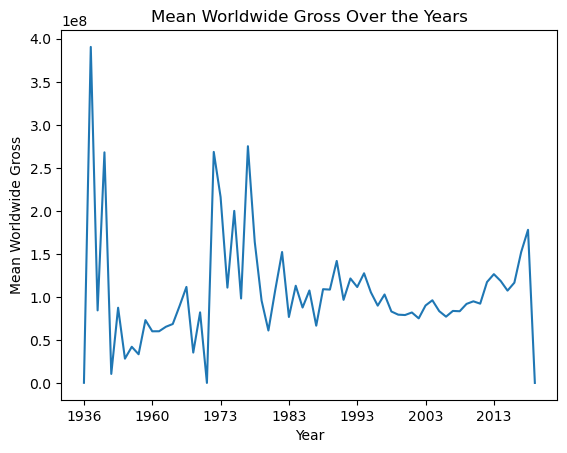

In [24]:
# Show mean worldwide gross over the years
data.groupby(data['release_date'].str.slice(-4))['worldwide_gross'].mean().plot(kind='line')
plt.title('Mean Worldwide Gross Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Worldwide Gross')
plt.show()